In [122]:
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

import pandas as pd
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

from ast import literal_eval
for col in ['job_skills', 'job_type_skills']:
    df[col] = df[col].apply(lambda x : literal_eval(x) if pd.notna(x) else x)

    
df_india = df[(df['job_country'] == 'India')].copy()
df_da_india = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')].copy()

In [123]:
df_india = df_india.dropna(subset = 'salary_year_avg')
df_da_india = df_da_india.dropna(subset = 'salary_year_avg')

In [124]:
df_india_data = df_india[df_india['job_title_short'].apply(lambda x: 'data' in str(x).lower())]
india_data = df_india_data.value_counts('job_title_short').to_frame().reset_index()
india_data_list_top5 = sorted(india_data['job_title_short'].values[:5].tolist())

In [125]:
india_data_list_top5

['Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Senior Data Engineer',
 'Senior Data Scientist']

In [126]:
# filter the df for the top 6 job titles
df_india_top5 = df_india[df_india['job_title_short'].isin(india_data_list_top5)]

# order the job titles by median salary
job_order = df_india_top5.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

# # Calculate median salary for Senior Data Engineers
# median_salary = df_india[df_india['job_title_short'] == 'Data Analyst']['salary_year_avg'].median()

# # Add it as a column to df_india_top5
# median_salary

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter, FuncFormatter

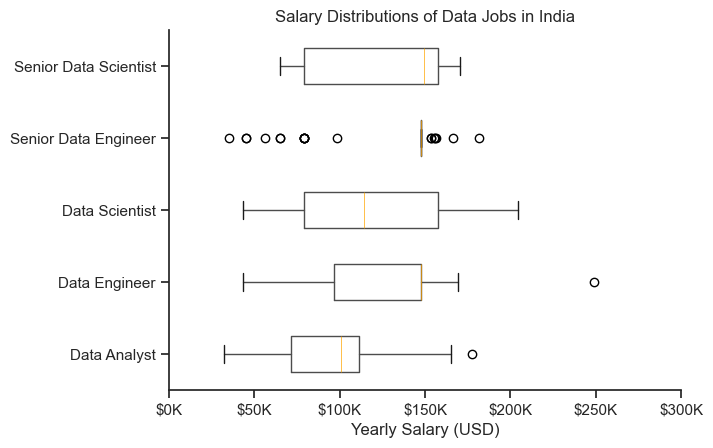

In [128]:
# Apply the theme first
sns.set_theme(style='ticks')


# Pandas Syntax
ax = df_india_top5.boxplot(
    column='salary_year_avg', 
    by='job_title_short', 
    vert=False, 
    grid=False, # Ticks style usually has no grid
    # Add this line to color the median
    medianprops={'color': 'orange', 'linewidth': 0.5},
)

# Apply the formatting from your snippet
plt.title('Salary Distributions of Data Jobs in India')
plt.suptitle('') # Removes the automatic 'Boxplot grouped by...' subtitle
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 300000)

# Apply the currency formatter
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)

sns.despine()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2776\4157873840.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data_to_plot, vert=False, labels=job_order)


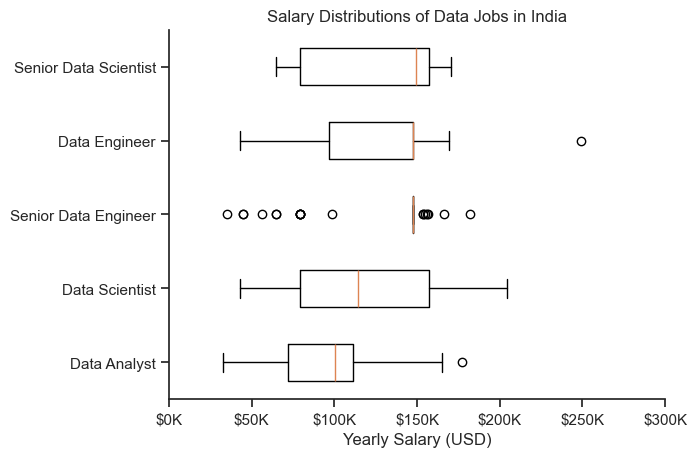

In [129]:
# 1. Prepare data in the specific order
data_to_plot = [df_india_top5[df_india_top5['job_title_short'] == job]['salary_year_avg'] for job in job_order]

# 2. Plot
fig, ax = plt.subplots()
ax.boxplot(data_to_plot, vert=False, labels=job_order)

# 3. Apply your specific styling
ax.set_title('Salary Distributions of Data Jobs in India')
ax.set_xlabel('Yearly Salary (USD)')
ax.set_xlim(0, 300000)
ax.invert_yaxis()
# Apply the currency formatter
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
ax.xaxis.set_major_formatter(ticks_x)

sns.despine() # Works on matplotlib axes too!
plt.show()

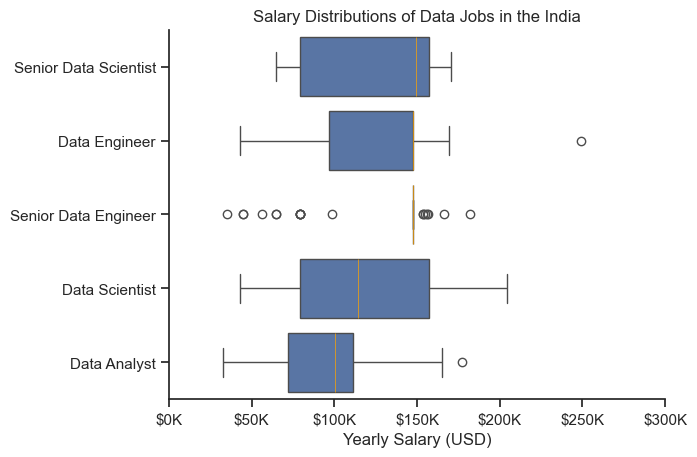

In [130]:
sns.boxplot(data=df_india_top5, x='salary_year_avg', y='job_title_short', order=job_order, medianprops={"color": "orange", "linewidth": 0.5}) # Highlights the median
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in the India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 300000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [132]:
df_explod_skills = df_da_india.explode('job_skills')

df_da_top_pay = df_explod_skills.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_da_top_pay = df_da_top_pay.head(10)

df_da_top_pay

,count,median
job_skills,,
postgresql,1,165000.0
pyspark,1,165000.0
gitlab,1,165000.0
linux,1,165000.0
mysql,1,165000.0
gdpr,2,163782.0
mongodb,6,163782.0
scala,3,163782.0
neo4j,1,163782.0


In [133]:
df_da_skills = df_explod_skills.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_da_skills = df_da_skills.head(10).sort_values(by='median', ascending=False)

df_da_skills

,count,median
job_skills,,
power bi,17,111175.0
spark,11,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


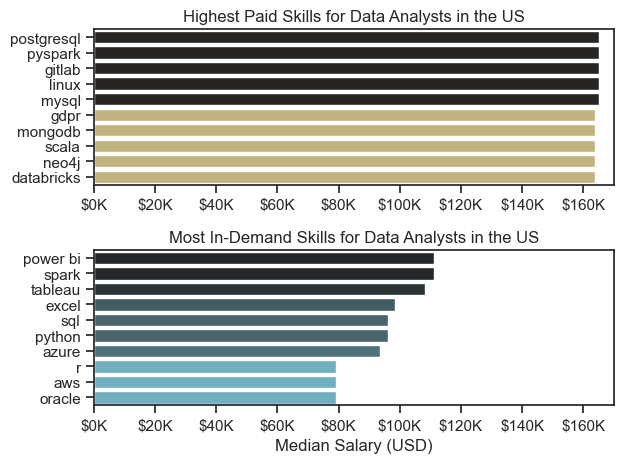

In [143]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_da_top_pay, x='median', y=df_da_top_pay.index, hue='median', ax=ax[0], palette='dark:y_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Analysts in the US')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_xlim(0, 170000) 
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_da_skills, x='median', y=df_da_skills.index, hue='median', ax=ax[1], palette='dark:c_r')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in the US')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()